In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

/Users/houzhuo/Documents/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
cap = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()

(1521, 44) (1521, 18) (1521, 26)


,1,2,3,4,5,6,7,8,9,10,...,Shoulder_L,Hip_R,Shoulder_R,Hip_u_L,Head,Hip_u_R,Head_u,Shoulder_pitch_L,Head_pitch,Shoulder_pitch_R
0,32.170,31.226,54.610,-12.289,37.270,-19.412,-15.922,-2.2978,-0.32138,-9.8953,...,-2196.000000,0,2243.000000,0,0,0,0,-254.000000,0,-631.000000
1,33.935,34.161,56.665,-12.488,39.463,-19.987,-17.261,-2.5077,-0.40396,-10.5590,...,-2196.736842,0,2240.684211,0,0,0,0,-240.421053,0,-597.947368
2,32.961,31.564,54.746,-11.809,36.489,-19.046,-16.506,-2.3873,-0.34868,-10.0670,...,-2197.473684,0,2238.368421,0,0,0,0,-226.842105,0,-564.894737
3,32.990,30.708,55.468,-11.346,35.372,-18.598,-16.070,-2.3202,-0.32733,-10.2220,...,-2198.210526,0,2236.052632,0,0,0,0,-213.263158,0,-531.842105
4,33.070,29.764,57.020,-10.839,34.338,-18.141,-15.418,-2.2212,-0.30061,-10.4740,...,-2198.947368,0,2233.736842,0,0,0,0,-199.684211,0,-498.789474


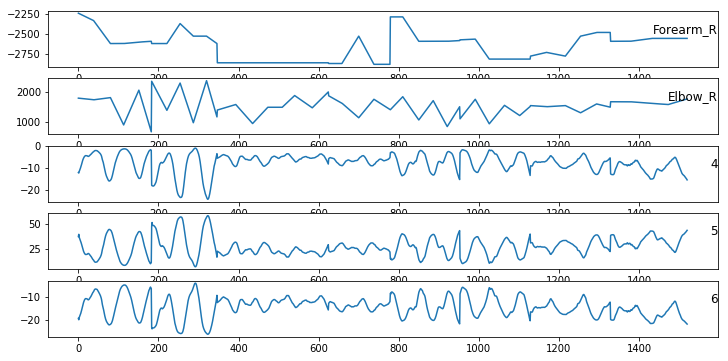

In [3]:
dataset = pd.concat([ full['Forearm_R'],full['Elbow_R'],full['4'],full['5'],full['6']] , axis=1 )
dataset.head()
type(dataset)
import matplotlib.pyplot as plt
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [13]:
import numpy as np
values = dataset.values
values = dataset.astype(np.float32)
#values -= np.mean(values, axis = 0)
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning

time_step=1
n_features=5
reframed = series_to_supervised(scaled, time_step, 1)
print(reframed.shape)
reframed.head()

(1520, 10)


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,1.000000,0.658019,0.521549,0.592035,0.309077,0.996187,0.657165,0.512978,0.634541,0.283502
2,0.996187,0.657165,0.512978,0.634541,0.283502,0.992375,0.656312,0.542221,0.576897,0.325356
3,0.992375,0.656312,0.542221,0.576897,0.325356,0.988562,0.655459,0.562162,0.555246,0.345282
4,0.988562,0.655459,0.562162,0.555246,0.345282,0.984749,0.654605,0.583997,0.535205,0.365608
5,0.984749,0.654605,0.583997,0.535205,0.365608,0.980937,0.653752,0.606392,0.514058,0.387269


In [29]:
values = reframed.values
train = values[:1000,:]
val = values[1000:1200,:]
test = values[1200:,:]
n_obs = time_step*n_features
train_X,train_y = train[:,:n_obs],train[:,-n_features:-n_features+2]
val_X,val_y = val[:,:n_obs],val[:,-n_features:-n_features+2]#第一个多少行
test_X,test_y = test[:,:n_obs],test[:,-n_features:-n_features+2]
print(train_X.shape,train_y.shape)
print(train_y)




(1000, 5) (1000, 2)
[[0.99618718 0.65716546]
 [0.99237474 0.65631204]
 [0.98856192 0.65545863]
 ...
 [0.414803   0.54021224]
 [0.40364442 0.52649933]
 [0.39248585 0.51278636]]


In [30]:
train_X = train_X.reshape(train_X.shape[0],time_step,n_features)
val_X = val_X.reshape(val_X.shape[0],time_step,n_features)
test_X = test_X.reshape(test_X.shape[0],time_step,n_features)
print(train_X.shape,train_y.shape,val_X.shape,val_y.shape,test_X.shape,test_y.shape)

(1000, 1, 5) (1000, 2) (200, 1, 5) (200, 2) (320, 1, 5) (320, 2)


Train on 1000 samples, validate on 200 samples
Epoch 1/50
 - 3s - loss: 0.2600 - val_loss: 0.0751
Epoch 2/50
 - 1s - loss: 0.1637 - val_loss: 0.0734
Epoch 3/50
 - 1s - loss: 0.1462 - val_loss: 0.0666
Epoch 4/50
 - 1s - loss: 0.1076 - val_loss: 0.1083
Epoch 5/50
 - 1s - loss: 0.0722 - val_loss: 0.0705
Epoch 6/50
 - 1s - loss: 0.0458 - val_loss: 0.0165
Epoch 7/50
 - 1s - loss: 0.0350 - val_loss: 0.0203
Epoch 8/50
 - 1s - loss: 0.0328 - val_loss: 0.0167
Epoch 9/50
 - 1s - loss: 0.0283 - val_loss: 0.0170
Epoch 10/50
 - 1s - loss: 0.0250 - val_loss: 0.0175
Epoch 11/50
 - 1s - loss: 0.0229 - val_loss: 0.0342
Epoch 12/50
 - 1s - loss: 0.0244 - val_loss: 0.0233
Epoch 13/50
 - 1s - loss: 0.0241 - val_loss: 0.0330
Epoch 14/50
 - 1s - loss: 0.0212 - val_loss: 0.0144
Epoch 15/50
 - 1s - loss: 0.0214 - val_loss: 0.0225
Epoch 16/50
 - 1s - loss: 0.0198 - val_loss: 0.0273
Epoch 17/50
 - 1s - loss: 0.0204 - val_loss: 0.0202
Epoch 18/50
 - 1s - loss: 0.0208 - val_loss: 0.0236
Epoch 19/50
 - 1s - loss: 

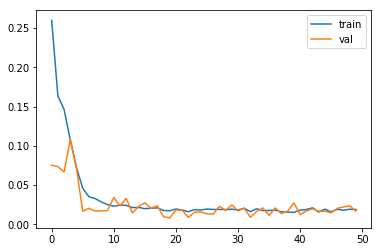

In [31]:
# design network
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(LSTM(20,return_sequences=True))
model.add(LSTM(10))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=5, validation_data=(val_X, val_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [32]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], time_step*n_features))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -3:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0:2]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 2))
inv_y = concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0:2]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19.401


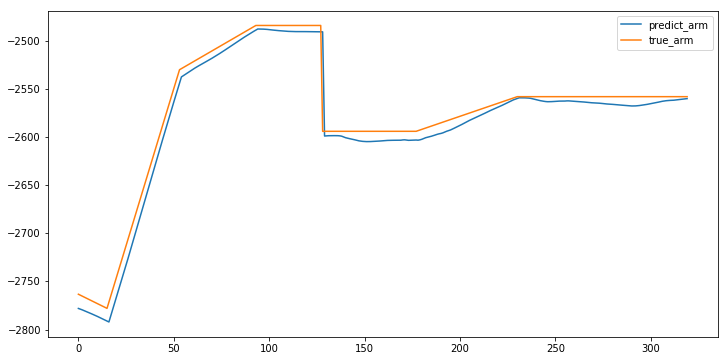

In [46]:
plt.figure(figsize=(12,6))
plt.plot(inv_yhat[:,0], label = 'predict_arm')
plt.plot(inv_y[:,0], label = 'true_arm')

plt.legend()
plt.show()

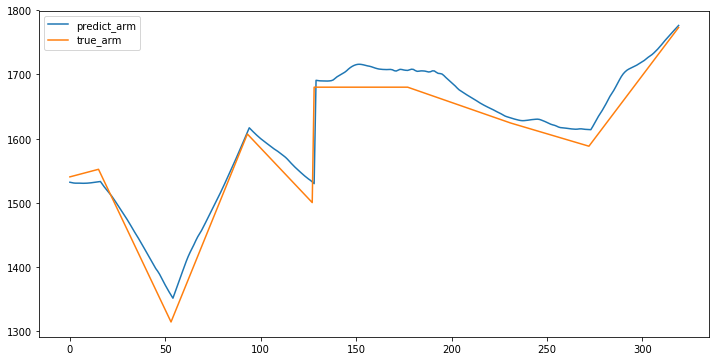

In [47]:
plt.figure(figsize=(12,6))

plt.plot(inv_yhat[:,1], label = 'predict_arm')
plt.plot(inv_y[:,1], label = 'true_arm')

plt.legend()
plt.show()